In [42]:
#this code aims to conver GIFTI files to CIFTI file first and
#parcellate to the target atlas
#use niwrap3912 conda environemnt
import os
import subprocess
import nibabel as nib

PARCELLATION_METHOD = 'MEAN'#be default set to mean, which will take the mean of the values in the parcel (use paraemters from the workbench -cifti parcellate)
dataType = 'exvivo' #or 'exvivo
baseDir = '/Users/dennis.jungchildmind.org/Library/CloudStorage/OneDrive-ChildMindInstitute/hcp1200-thickness' if dataType == 'hcp' else '/Users/dennis.jungchildmind.org/Downloads/exvivo/'
atlas_dir = '/Users/dennis.jungchildmind.org/OneDrive - Child Mind Institute/parcellation/schaefer2018'
atlas_path = f'{atlas_dir}/Schaefer2018_400Parcels_7Networks_order.dlabel.nii'
atlas_name = os.path.basename(atlas_path).split('_')[0]
num_parcels = os.path.basename(atlas_path).split('_')[1]
atlas_name = f'{atlas_name}_{num_parcels}'

#inf.pial. or wm.inf. or nothing ''
boundary = 'wm.inf.' if dataType == 'exvivo' else ''

subject_dirs = [d for d in os.listdir(baseDir) if os.path.isdir(os.path.join(baseDir, d))]

def process_hemisphere(subject, hemi, is_hcp=False, method = 'MEAN'):
    if is_hcp:
        prefix = f'{subject}.{hemi}'
        side = 'left' if hemi == 'L' else 'right'
    else:
        prefix = f'{hemi}h'
        side = 'left' if hemi == 'l' else 'right'
        
    base_path = f'{baseDir}/{subject}/{prefix}.thickness'
    check_file = f'{base_path}.32k_fs_LR.shape.gii'
    
    #if hemi == 'L':
    #    atlas_path = f'{atlas_dir}/Schaefer2018_400Parcels_17Networks_order.lh.dlabel.nii'
    #else:
    #    atlas_path = f'{atlas_dir}/Schaefer2018_400Parcels_17Networks_order.rh.dlabel.nii'
  
        
    if os.path.exists(check_file):
        gii_in_path = f'{base_path}.{boundary}32k_6mm_fwhm_fs_LR.shape.gii'
        cifti_in_path = f'{base_path}.{boundary}32k_6mm_fwhm_fs_LR.dscalar.nii'
        
        #if method == 'MEAN':
        #    cifti_out_path = f'{base_path}.{boundary}32k_6mm_fwhm_fs_LR.{atlas_name}.pscalar.nii'
        #elif method == 'COV':
        cifti_out_path = f'{base_path}.{boundary}32k_6mm_fwhm_fs_LR.{atlas_name}.{method}.pscalar.nii'
        
        # Convert gifti to cifti
        if not os.path.exists(cifti_in_path):
            subprocess.run(f"""
                            wb_command -cifti-create-dense-scalar '{cifti_in_path}' -left-metric '{gii_in_path}' -right-metric '{gii_in_path}'
                            """, shell=True)
        else:
            print(f"Cifti file already exists: {cifti_in_path}")
        
        # Parcellate
        if method == 'MEAN':
            subprocess.run(f"""
                            wb_command -cifti-parcellate '{cifti_in_path}' '{atlas_path}' COLUMN '{cifti_out_path}' -method {method} -exclude-outliers 2 2
                            """, shell=True)
        elif method == 'COV':
            subprocess.run(f"""
                            wb_command -cifti-parcellate '{cifti_in_path}' '{atlas_path}' COLUMN '{cifti_out_path}' -method '{method}'
                            """, shell=True)
        else: 
            raise ValueError(f"Invalid parcellation method: {PARCELLATION_METHOD}")

for subject in subject_dirs:
    if dataType == 'exvivo':
        process_hemisphere(subject, 'l', method = PARCELLATION_METHOD)
        process_hemisphere(subject, 'r', method = PARCELLATION_METHOD)
    else:  # hcp
        process_hemisphere(subject, 'L', True, method = PARCELLATION_METHOD)
        process_hemisphere(subject, 'R', True, method = PARCELLATION_METHOD)


Cifti file already exists: /Users/dennis.jungchildmind.org/Downloads/exvivo//I57_new_confidence/lh.thickness.wm.inf.32k_6mm_fwhm_fs_LR.dscalar.nii
Cifti file already exists: /Users/dennis.jungchildmind.org/Downloads/exvivo//I58_new_confidence/lh.thickness.wm.inf.32k_6mm_fwhm_fs_LR.dscalar.nii
Cifti file already exists: /Users/dennis.jungchildmind.org/Downloads/exvivo//I45_new_confidence/lh.thickness.wm.inf.32k_6mm_fwhm_fs_LR.dscalar.nii
Cifti file already exists: /Users/dennis.jungchildmind.org/Downloads/exvivo//I59_new_confidence/rh.thickness.wm.inf.32k_6mm_fwhm_fs_LR.dscalar.nii
Cifti file already exists: /Users/dennis.jungchildmind.org/Downloads/exvivo//I56_new_confidence/rh.thickness.wm.inf.32k_6mm_fwhm_fs_LR.dscalar.nii
Cifti file already exists: /Users/dennis.jungchildmind.org/Downloads/exvivo//I41_new_confidence/lh.thickness.wm.inf.32k_6mm_fwhm_fs_LR.dscalar.nii
Cifti file already exists: /Users/dennis.jungchildmind.org/Downloads/exvivo//I54_new_confidence/lh.thickness.wm.inf.32

In [43]:
#for bigbrain 
#this code aims to conver GIFTI files to CIFTI file first and
#parcellate to the target atlas
#use niwrap3912 conda environemnt
import os
import subprocess


baseDir = '/Users/dennis.jungchildmind.org/Downloads/BigBrain/thickness/resample'


#find all the shape.gii files in the baseDir
shape_files = [f for f in os.listdir(baseDir) if f.endswith('6mm_fwhm.shape.gii')]


def process_hemisphere(shape_file, method = 'MEAN'):
        
    gii_in_path = f'{baseDir}/{shape_file}'
    cifti_in_path = f'{baseDir}/{shape_file[:-9]}.dscalar.nii'
    
    
    #if method == 'MEAN':
    #    cifti_out_path= f'{baseDir}/{shape_file[:-9]}{atlas_name}.pscalar.nii'
    #elif method == 'COV':
    cifti_out_path = f'{baseDir}/{shape_file[:-9]}{atlas_name}.{method}.pscalar.nii'
    #else:
    #    raise ValueError(f"Invalid parcellation method: {method}")
    
    print(cifti_out_path)
    # Convert gifti to cifticd
    subprocess.run(f"""
                    wb_command -cifti-create-dense-scalar '{cifti_in_path}' -left-metric '{gii_in_path}' -right-metric '{gii_in_path}'
                    """, shell=True)
    
    # Parcellate
    if method == 'MEAN':
        subprocess.run(f"""
                        wb_command -cifti-parcellate '{cifti_in_path}' '{atlas_path}' COLUMN '{cifti_out_path}' -exclude-outliers 2 2
                        """, shell=True)
    elif method == 'COV':
        subprocess.run(f"""
                        wb_command -cifti-parcellate '{cifti_in_path}' '{atlas_path}' COLUMN '{cifti_out_path}' -method '{method}'
                        """, shell=True)
    else:
        raise ValueError(f"Invalid parcellation method: {method}")


for shape_file in shape_files:
    print(shape_file)
    process_hemisphere(shape_file, PARCELLATION_METHOD)

lh.4-5.32k._6mm_fwhm.shape.gii
/Users/dennis.jungchildmind.org/Downloads/BigBrain/thickness/resample/lh.4-5.32k._6mm_fwhm.Schaefer2018_400Parcels.MEAN.pscalar.nii
rh.0-2.32k._6mm_fwhm.shape.gii
/Users/dennis.jungchildmind.org/Downloads/BigBrain/thickness/resample/rh.0-2.32k._6mm_fwhm.Schaefer2018_400Parcels.MEAN.pscalar.nii
lh.0-4.32k._6mm_fwhm.shape.gii
/Users/dennis.jungchildmind.org/Downloads/BigBrain/thickness/resample/lh.0-4.32k._6mm_fwhm.Schaefer2018_400Parcels.MEAN.pscalar.nii
rh.0-6.32k._6mm_fwhm.shape.gii
/Users/dennis.jungchildmind.org/Downloads/BigBrain/thickness/resample/rh.0-6.32k._6mm_fwhm.Schaefer2018_400Parcels.MEAN.pscalar.nii
lh.2-3.32k._6mm_fwhm.shape.gii
/Users/dennis.jungchildmind.org/Downloads/BigBrain/thickness/resample/lh.2-3.32k._6mm_fwhm.Schaefer2018_400Parcels.MEAN.pscalar.nii
lh.1-2.32k._6mm_fwhm.shape.gii
/Users/dennis.jungchildmind.org/Downloads/BigBrain/thickness/resample/lh.1-2.32k._6mm_fwhm.Schaefer2018_400Parcels.MEAN.pscalar.nii
rh.3-4.32k._6mm_fwhm.s

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


{0: ('???', (1.0, 1.0, 1.0, 0.0)), 1: ('17Networks_LH_VisCent_ExStr_1', (0.470588, 0.0705882, 0.513726, 1.0)), 2: ('17Networks_LH_VisCent_ExStr_2', (0.470588, 0.0705882, 0.517647, 1.0)), 3: ('17Networks_LH_VisCent_ExStr_3', (0.470588, 0.0705882, 0.521569, 1.0)), 4: ('17Networks_LH_VisCent_ExStr_4', (0.470588, 0.0705882, 0.52549, 1.0)), 5: ('17Networks_LH_VisCent_ExStr_5', (0.470588, 0.0705882, 0.533333, 1.0)), 6: ('17Networks_LH_VisCent_ExStr_6', (0.470588, 0.0705882, 0.537255, 1.0)), 7: ('17Networks_LH_VisCent_Striate_1', (0.470588, 0.0705882, 0.541176, 1.0)), 8: ('17Networks_LH_VisCent_ExStr_7', (0.470588, 0.0705882, 0.545098, 1.0)), 9: ('17Networks_LH_VisCent_ExStr_8', (0.470588, 0.0705882, 0.54902, 1.0)), 10: ('17Networks_LH_VisCent_ExStr_9', (0.470588, 0.0705882, 0.552941, 1.0)), 11: ('17Networks_LH_VisCent_ExStr_10', (0.470588, 0.0705882, 0.556863, 1.0)), 12: ('17Networks_LH_VisCent_ExStr_11', (0.470588, 0.0745098, 0.529412, 1.0)), 13: ('17Networks_LH_VisPeri_ExStrInf_1', (1.0, 0

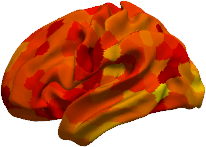

In [44]:
import nibabel as nib
import yaspy
# Create a mapping array where index i contains total[i-1] for atlas values 1-400
import numpy as np
# Get list of all subject directories
subject_dirs = [d for d in os.listdir('/Users/dennis.jungchildmind.org/Downloads/exvivo') if os.path.isdir(os.path.join('/Users/dennis.jungchildmind.org/Downloads/exvivo', d))]

# Initialize arrays to store data
all_total = []
all_wm_inf = []
all_inf_pial = []

# Load data for each subject
for subject_name in subject_dirs:
    try:
        total_path = f'/Users/dennis.jungchildmind.org/Downloads/exvivo/{subject_name}/lh.thickness.32k_6mm_fwhm_fs_LR.Schaefer2018_400Parcels.pscalar.nii'
        wm_inf_path = f'/Users/dennis.jungchildmind.org/Downloads/exvivo/{subject_name}/lh.thickness.wm.inf.32k_6mm_fwhm_fs_LR.Schaefer2018_400Parcels.pscalar.nii'
        inf_pial_path = f'/Users/dennis.jungchildmind.org/Downloads/exvivo/{subject_name}/lh.thickness.inf.pial.32k_6mm_fwhm_fs_LR.Schaefer2018_400Parcels.pscalar.nii'
        
        if os.path.exists(total_path):
            all_total.append(nib.load(total_path).get_fdata()[0])
            all_wm_inf.append(nib.load(wm_inf_path).get_fdata()[0])
            all_inf_pial.append(nib.load(inf_pial_path).get_fdata()[0])
    except:
        print(f"Could not load data for subject {subject_name}")

# Calculate averages
total = np.mean(all_total, axis=0)
wm_inf = np.mean(all_wm_inf, axis=0)
inf_pial = np.mean(all_inf_pial, axis=0)


atlas_path = '/Users/dennis.jungchildmind.org/OneDrive - Child Mind Institute/parcellation/schaefer2018/Schaefer2018_400Parcels_17Networks_order.dlabel.nii'

print(nib.load(atlas_path).header.get_axis(0).get_element(0)[1])
atlas = nib.load(atlas_path).get_fdata()

mapped_values = np.zeros(atlas.shape[1])
for i in range(atlas.shape[1]):
    atlas_vals = atlas[:,i] # Get column i
    if len(atlas_vals) > 0:
        atlas_val = int(atlas_vals[0]) # Take first value since they should all be the same
        if atlas_val > 0 and atlas_val <= atlas.shape[1]:
            mapped_values[i] = total[atlas_val-1] # -1 since atlas is 1-based indexing
print(mapped_values)



lh_surf = '/Users/dennis.jungchildmind.org/Downloads/HCP_S1200_Atlas_Z4_pkXDZ/S1200.L.white_MSMAll.32k_fs_LR.surf.gii'
rh_surf = '/Users/dennis.jungchildmind.org/Downloads/HCP_S1200_Atlas_Z4_pkXDZ/S1200.R.white_MSMAll.32k_fs_LR.surf.gii'


 # Variance plotter  
plotter = yaspy.Plotter(lh_surf, hemi='lh')
overlay_var = plotter.overlay(mapped_values[:32492], cmap='jet', alpha=1)
plotter.border(mapped_values[:32492], alpha=0)

plotter.screenshot("lateral")
#plotter.screenshot("medial")
